
### 8. 좀 더 편리한 시각화 도구 - seaborn

지난 시간에 matplotlib을 활용하여 바그래프도 그려보고, 회귀선도 그려봤을 거에요. 이번에 배울 seaborn은 matplotlib와 같이 시각화 기능을 제공하지만, 좀 더 세련되고 편한 기능을 더 많이 제공하기 때문에 seaborn을 많이 사용해요. 이것도 seaborn에서 그래프들을 보면서 내가 자주 쓸만 한 것들을 모아두고 써먹을 수 있도록 해놓으면 좋습니다. 아래 튜토리얼들을 보시면 seaborn이 제공하는 많은 시각화자료들을 보실 수 있습니다. 

- [seaborn tutorials](https://seaborn.pydata.org/tutorial.html)
- 터미널에서 **pip install seaborn** 하는 것 잊지말기!

예시를 통해서 seaborn을 먼저 학습해봅시다. seaborn은 matplotlib도 import되어 있어야 사용할 수 있어요.

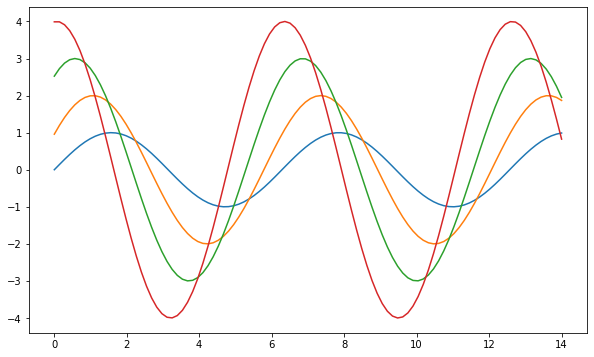

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 

x = np.linspace(0,14,100)
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4) # 이게 무슨 의미일까요? 

요렇게 사인 함수를 그려보았습니다. matplotlib보다 색감이 더 이쁘지 않나요?ㅎㅎ 좀 더 세련된 느낌이라서 좋아요. 

아래는 배경을 흰색 그리드 배경으로 바꿀 수 있어요.

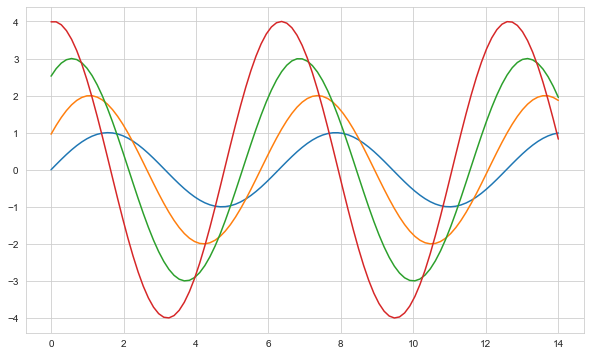

In [ ]:
sns.set_style("whitegrid") 

plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)

호우, 훨씬 더 세련됐네요. 

seaborn은 자체적으로 연습할 수 있는 데이터셋을 제공해요. 그래서 그 데이터셋을 가지고 연습해볼 수 있어요.

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
type(tips)  # 데이터프레임이네요.

pandas.core.frame.DataFrame

항상 어떤 데이터인지 확인해보는 습관 잊지마시고, 이 그래프가 무엇을 의미하는지 한번 생각해봅시다. tip? sex는 알겠고, smoker는 흡연 유무겠고, time은 시간인데 이게 뭘 의미하지? 이건 요일별 점심, 저녁, 흡연 여부와 식사 금액(total_bill)과 tip을 정리한 데이터에요. 

이것을 박스플롯으로 한번 그려볼게요.

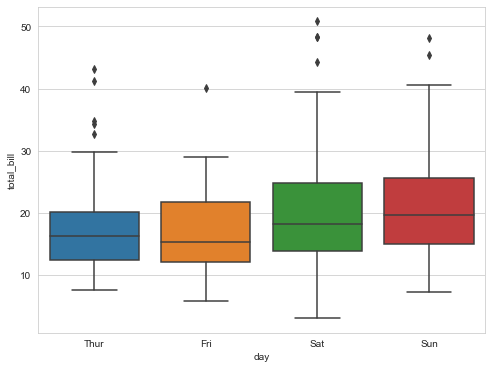

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

박스플롯은 이후 아주 많은 데이터들을 개괄해볼 때 유용한 시각화에요. 이 그래프를 보면, 토요일-일요일, 주말에 평균적으로 사람들이 식사 금액으로 더 지출을 많이 하나 봅니다. 통계를 배우신 분들은 알 수도 있는데요, 저게 무엇을 의미하는지는 아래 그림을 이해해보세요.

![what is boxplot?](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile30.uf.tistory.com%2Fimage%2F99EB75395D759A192ACC70)

이것을 보면 아웃라이어를 금방 알 수 있어요. 위에 점 표시가 된게 보이죠? 이게 기존 데이터의 경향을 봤을 때, 경향을 벗어나는 아웃라이어 값들이에요. 나중에 머신러닝하면 요런 값들이 성능을 저하시키는 요인들이 될 수 있기 때문에 요것들을 어찌할 지 고민하게 됩니다ㅎㅎ 아무튼 유용한 그래프니 사용법 알아두세욥!

아래와 같이 hue를 사용하면 hue에 들어간 인자를 기준으로 박스플랏을 나눠 그릴 수도 있어요. palette는 색을 정하는 거에요. (약간 파스텔톤이라 비주얼에 미친자 마음을 두근두근하게 하네요..)

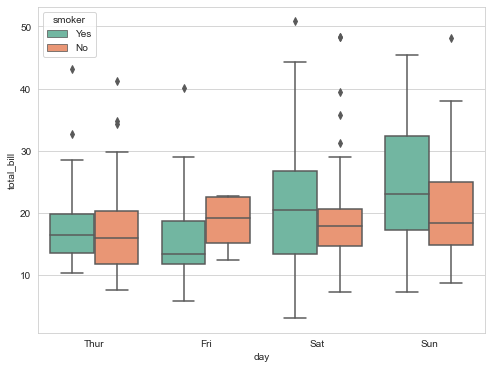

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", 
            hue="smoker", data=tips, palette="Set2")
plt.show()

오호, 주말에는 흡연자의 식사 평균 비용이 더 높네요. 스펙트럼도 더 넓구요. 

지난 번에 matplotlib으로 힘들게 회귀선을 그려봤잖아요? 이번에는 seaborn이 스스로 회귀선까지 그려줘서 제공을 합니다.(왜 이거부터 안알려줬어요!!! - 인생이 원래 그래요.) 그게 lmplot이에요.

- [seaborn - lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

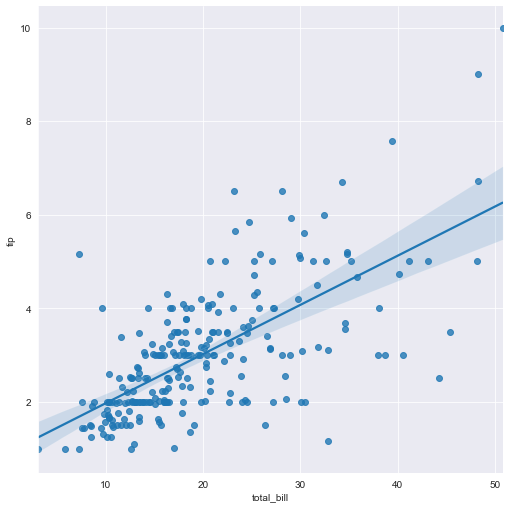

In [ ]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill",y="tip", data=tips, height=7)
plt.show()

회귀선이 잘 그려졌네요. 보니까 확실히 식사 총 비용이 높을수록, 팁을 더 많이 주는 경향이 보이네요. 요 그래프의 장점은 ci(confidence interval) 즉, 신뢰구간까지 보여준다는 거에요. 옅은 파란색 면적 부분이 보이죠? 그게 바로 회귀추정치의 신뢰구간크기랍니다. 무척 편한 기능을 제공하죠? 

아래는 또 hue를 설정하여 흡연 유무에 따라 회귀선을 그려볼 수 있어요.

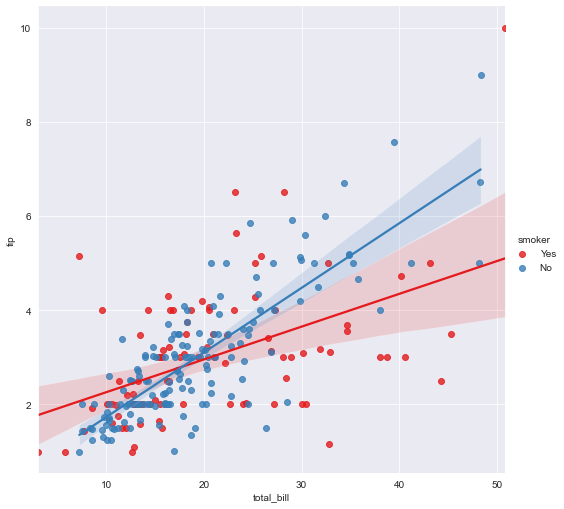

In [ ]:
sns.lmplot(x="total_bill",y="tip", hue="smoker", 
           data=tips, palette="Set1", height=7)
plt.show()

보니까 대체적으로 비흡연자분들이 식사비용에 비해 팁을 더 많이 주시는 것 같네요. 

이번에는 연도 및 월별 항공기승객수 데이터로 시각화를 해볼게요.

In [ ]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


이걸 x축은 연도, y축은 달로 바꿔 승객수를 나타내보도록 할게요. pivot을 사용할 거에요.

In [ ]:
flights = flights.pivot("month","year","passengers") # (index, column, values)
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


오호, 연도가 갈수록 확실히 승객수가 많아지죠? 이런 경향성을 잘 볼 수 있도록 heatmap을 사용하여 시각화해볼게요.

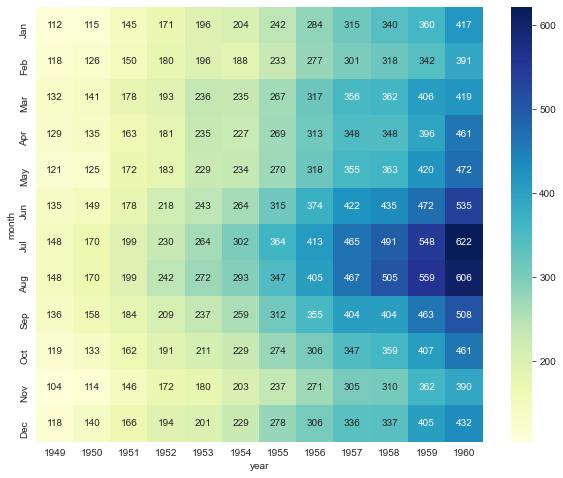

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

뭐땀시 아래위로 잘려 나오는지는 모르겠지만, 아무튼 이렇게 나왔습니다. default color로 하면 승객수가 적은 곳이 진하게 나와서 cmap으로 색을 바꾸어 보았습니다. 한눈에 승객수 경향을 알아보기 쉽죠. 꺄아, 이 맛에 시각화하는거죠.

- annot=True: 위에 승객수까지 표시되게 하는 것
- fmt='d': 포매팅, 정수형태로 포매팅하라.

이번에는 머신러닝 거의 교과서급 예제인 아이리스꽃 데이터를 가져오도록 하겠습니다.

In [ ]:
sns.set(style="ticks")
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


붓꽃의 꽃잎, 꽃받침의 너비와 폭을 가지고 붓꽃의 종류를 구분할 수 있는지 알아보는 데이터에요. 

아래 pairplot을 명령하면 멋있는 그래프들이 나옵니다.

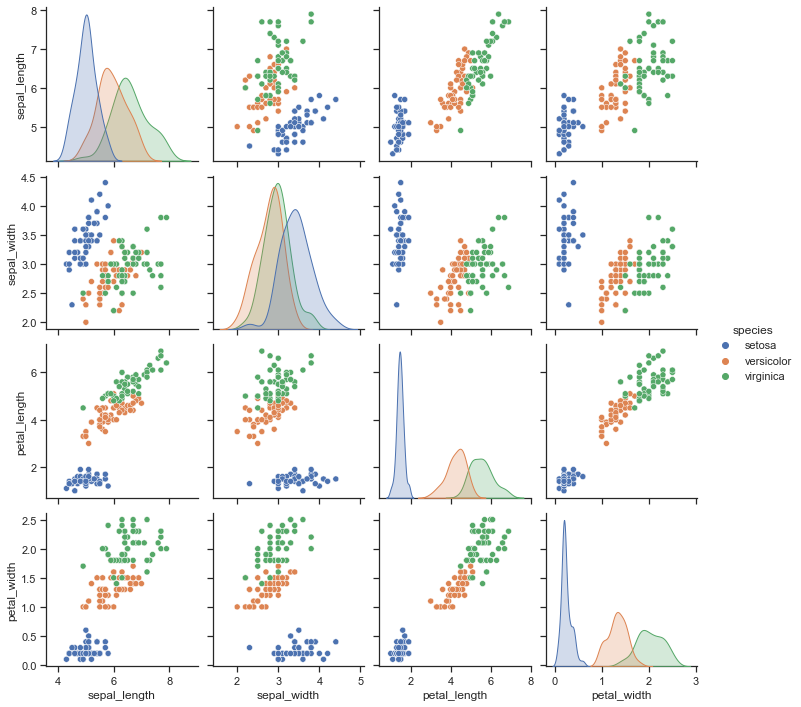

In [ ]:
sns.pairplot(iris, hue="species")
plt.show()

### 9. 범죄 데이터 시각화하기 

그럼 이제 seaborn으로 가공해놓은 데이터를 가지고 시각화해볼게요. matplotlib도 함께 써야 하니까 한글 폰드 문제부터 일단 해결해보구요.(matplotlib넘덜 지금 한글 무시하니..?)

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

import platform 

from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [ ]:
crime_anal_norm.head()

,"강간,추행",강도,살인,절도,폭력,"강간,추행 검거율",강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.928571,0.500000,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017,537800,6502,4.428571,385.596346
강동구,0.265537,1.000000,0.250000,0.396131,0.292991,88.829787,93.333333,100.000000,47.621951,87.384140,466472,2547,2.204659,417.169212
강북구,0.224576,0.285714,0.750000,0.000000,0.242054,83.018868,80.000000,88.888889,62.820513,89.433132,302563,2462,1.502344,404.161401
강서구,0.374294,0.357143,0.833333,0.418701,0.497963,83.773585,83.333333,90.000000,63.351095,85.357873,579768,2560,2.481434,405.815887
관악구,0.569209,0.142857,1.000000,0.667434,0.566830,87.096774,100.000000,100.000000,51.009421,90.091813,499449,4942,2.946330,428.198009


우선 먼저 강도, 살인, 폭력 간의 상관관계부터 볼까요? 아까 멋지구리했던 pairplot을 활용하여 나타내보도록 하겠습니다.

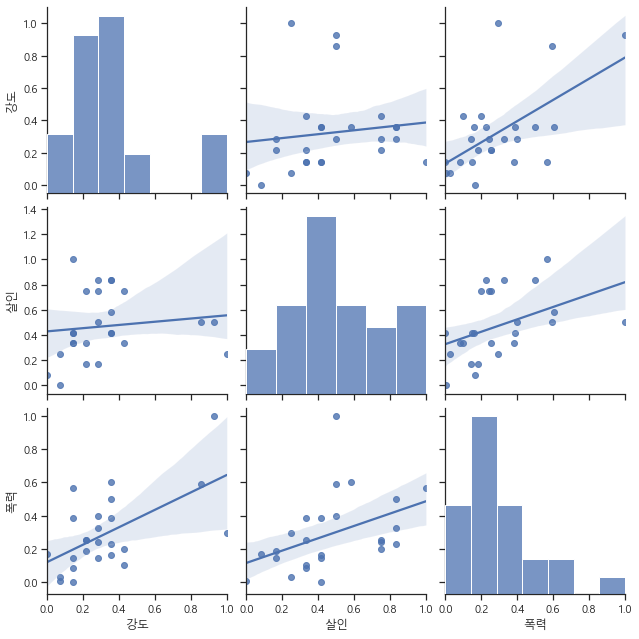

In [ ]:
sns.pairplot(crime_anal_norm, vars=['강도','살인','폭력'],
             kind='reg', height=3) 
plt.show()

앞에서는 산점도가 나왔는데, 이번에는 kind='reg' 옵션을 주어 회귀 그래프로 나타나게 했어요. 강도-폭력, 살인-폭력, 강도-살인 모두 양의 상관관계를 보여주네요. 

이번에는 인구수와 CCTV 개수를 x축, 살인과 강도를 y축에 두고 그래프를 그려 볼게요.

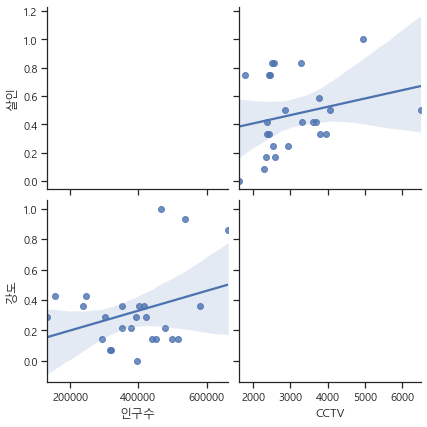

In [ ]:
sns.pairplot(crime_anal_norm, x_vars=['인구수','CCTV'],
             y_vars=['살인','강도'], kind='reg',height=3)
plt.show()

CCTV와 살인의 관계가 낮을지 몰라도 CCTV가 없을 때 살인이 많이 일어나는 구간이 있네요. 대체적으로 양의 상관관계를 보이고 있어요. 

살인 및 폭력 검거율과 CCTV의 관계도 살펴볼게요.

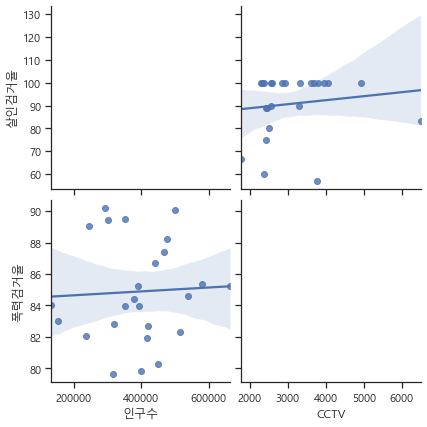

In [ ]:
sns.pairplot(crime_anal_norm, x_vars=['인구수','CCTV'],
             y_vars=['살인검거율','폭력검거율'], kind='reg',height=3)
plt.show()

또잉? CCTV-살인검거울, CCTV-폭력검거율, 인구수-폭력검거율은 음의 상관관계이네요. CCTV가 많다고 살인이나 폭력사건이 더 검거가 잘 되는 것은 아닌 가봐요. 

그럼 이제 heatmap으로 구별 검거율을 한번 살펴볼게요. 그 전에 정규화된 검거의 합으로 정렬하기 위해서 아래와 같이 가공을 해볼거에요. 

In [ ]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', 
                                                   ascending=False)
crime_anal_norm_sort.head()

,"강간,추행",강도,살인,절도,폭력,"강간,추행 검거율",강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
동작구,0.319209,0.000000,0.083333,0.258406,0.166259,53.539823,200.000000,100.0,44.146160,83.997548,394364,2297,0.827208,100.000000
송파구,0.405367,0.857143,0.500000,0.759558,0.591687,81.881533,130.769231,100.0,41.416221,85.233645,663965,2854,3.113755,91.201090
중랑구,0.258475,0.285714,0.833333,0.334408,0.325591,83.606557,120.000000,90.0,59.030544,85.262117,391885,3296,2.037521,90.910150
성동구,0.162429,0.142857,0.416667,0.108706,0.000000,85.217391,100.000000,100.0,55.610236,90.188062,292672,3602,0.830659,89.481093
관악구,0.569209,0.142857,1.000000,0.667434,0.566830,87.096774,100.000000,100.0,51.009421,90.091813,499449,4942,2.946330,88.896128


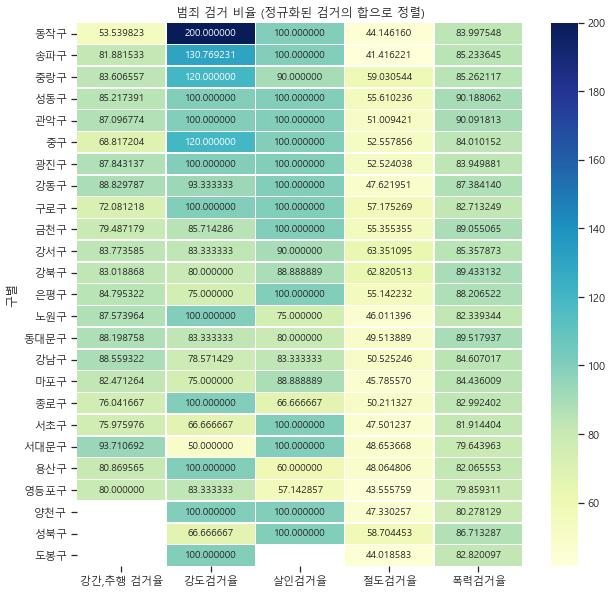

In [ ]:
target_col = ['강간,추행 검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, 
            fmt='f', cmap="YlGnBu", linewidths=.5)
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

결과적으로 보면 절도 검거율은 다른 범죄율에 비해 검거율이 낮죠? 살인은 아무래도 다른 범죄들보다 무거운 범죄라 검거율이 높은 것 같구요. 구로 볼 때에는 도봉구, 광진구, 성동구가 검거율이 우수한 것 같고요. 근데 우리의 목표를 잊지 말아야지요. 강남 3구의 체감 안전도를 검증해보는 거였잖아요. 보니까 아래쪽에 서초구가 있네요. 그닥 좋은 것 같지는 않은데요. 송파구와 강남도 다른 구들에 비해 좋아보이지는 않네요. 

이번에는 발생 건수의 합으로 정렬해서 heatmap으로 볼게요.

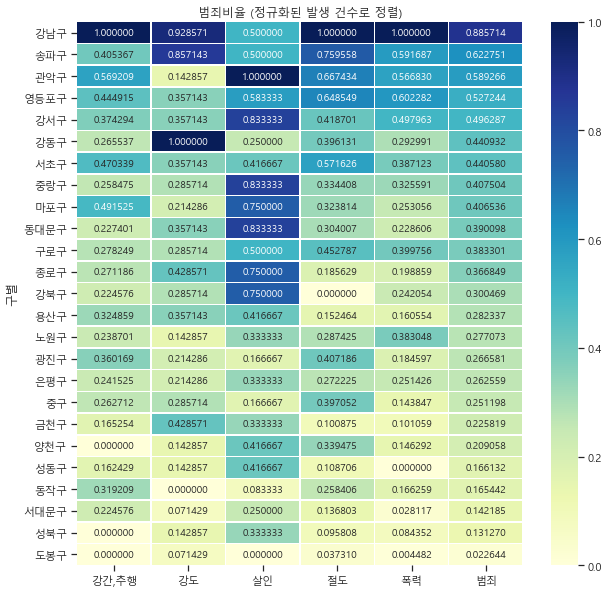

In [ ]:
target_col = ['강간,추행','강도','살인','절도','폭력','범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, 
            fmt='f', cmap="YlGnBu", linewidths=.5)
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

발생건수로 보면 강남구, 양천구, 영등포구가 많은데, 강남 3구가 실제로 안전하게 보이는 것 같지는 않습니다. 강남구, 송파구, 서초구가 위쪽에 위치해 있으니까요... 의문이네요. 

이쯤 했으니 이제까지 한 데이터를 저장해놓겠습니다. 아래 이름으로 저장이 됩니다.

In [ ]:
crime_anal_norm.to_csv('02. crime_in_Seoul_final.csv', 
                       sep=',', encoding='utf-8')